## Choose a dataset of flower images and train the CNN. Test the same and classify yellow flowers from the set.

## Description:
* The Aim of the project is to implement yellow flower classification using Convolution Neural Networks by training the dataset which consist of other various flowers of different colors and also yellow colored flowers 


* The Dataset is downloaded for this Link : http://www.robots.ox.ac.uk/~vgg/data/flowers/102/


* I Implemented 1 Input Layer, 3 Hidden Layers and 1 Output Layer for this program and used relu sigmoid activation function and the loss function I used here is Binary cross entropy which will help to reduce the loss and increase the accuracy of the model.This model scored 0.9935 accuracy and 0.8813 as validation accuracy when validating with the test dataset


 ### CNN:
* A Convolutional Neural Network is a Deep Learning algorithm which can take in an input image, assign importance to various aspects/objects in the image and be able to differentiate one from the other

### Dataset:


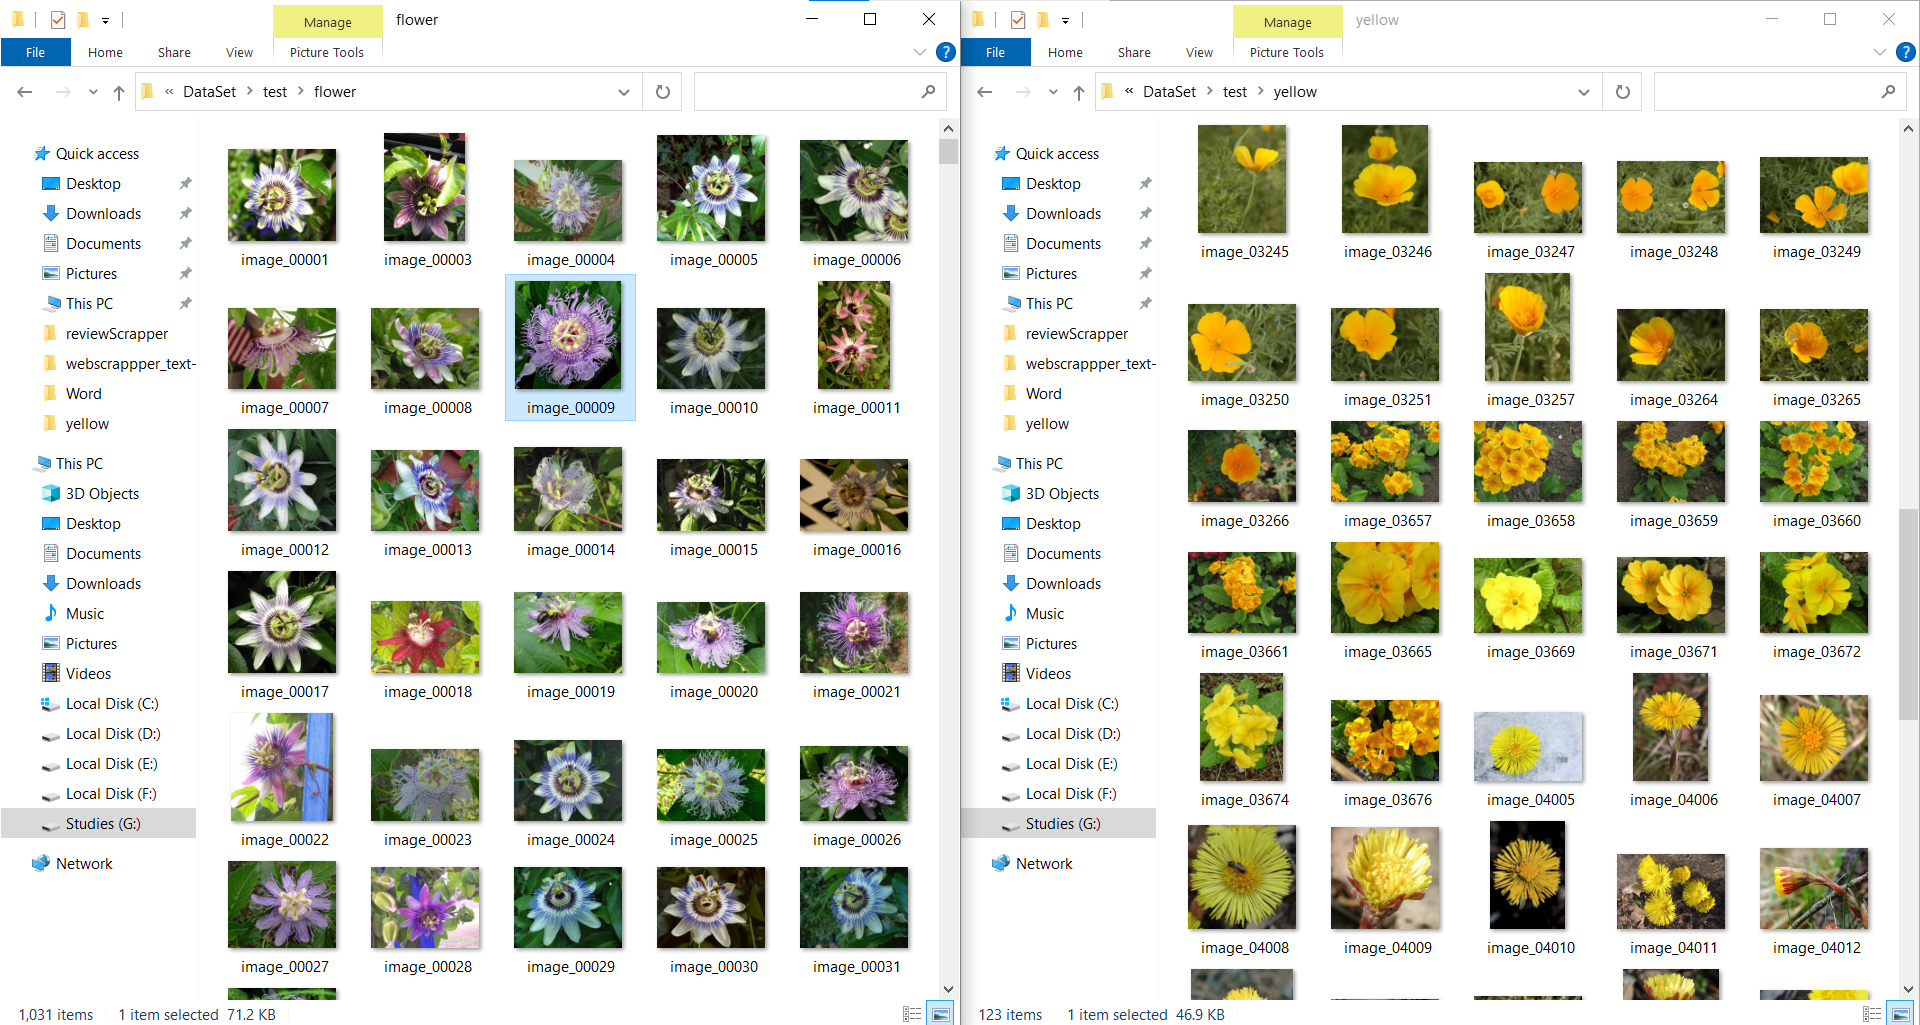

In [3]:
Image(filename='G:\M.Sc DS\Sem-III\DL PRACTICAL COMPONENT\capture.png')

## Code:

In [2]:
import tensorflow as tf
import keras as k
import numpy as np

from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator 

Using TensorFlow backend.


In [3]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = (64,64,3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2),padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2),padding='valid')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2),strides=(1,1))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.1)) 

model.add(Dense(2)) 
model.add(Activation('sigmoid'))

In [4]:
model.compile(loss ='binary_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"G:\M.Sc DS\Sem-III\DL PRACTICAL COMPONENT\DataSet\train",
                                target_size = (64, 64),batch_size = 32,class_mode = "categorical")

test_set = test_datagen.flow_from_directory(r"G:\M.Sc DS\Sem-III\DL PRACTICAL COMPONENT\DataSet\test",
                                target_size = (64, 64),batch_size = 32,class_mode = 'categorical')

model_sum = model.fit_generator(training_set,steps_per_epoch = 200,
                         epochs = 10,validation_data = test_set, validation_steps = 100)


Found 3113 images belonging to 2 classes.
Found 1155 images belonging to 2 classes.
Epoch 1/10
200/200 [==============================] - 38s 191ms/step - loss: 0.1697 - accuracy: 0.9285 - val_loss: 0.3730 - val_accuracy: 0.9258
Epoch 2/10
200/200 [==============================] - 37s 184ms/step - loss: 0.1285 - accuracy: 0.9480 - val_loss: 0.0852 - val_accuracy: 0.8950
Epoch 3/10
200/200 [==============================] - 37s 184ms/step - loss: 0.1085 - accuracy: 0.9577 - val_loss: 0.1496 - val_accuracy: 0.8909
Epoch 4/10
200/200 [==============================] - 37s 187ms/step - loss: 0.0859 - accuracy: 0.9645 - val_loss: 0.0643 - val_accuracy: 0.9287
Epoch 5/10
200/200 [==============================] - 38s 188ms/step - loss: 0.0674 - accuracy: 0.9740 - val_loss: 0.3020 - val_accuracy: 0.9235
Epoch 6/10
200/200 [==============================] - 37s 184ms/step - loss: 0.0537 - accuracy: 0.9795 - val_loss: 0.1920 - val_accuracy: 0.9125
Epoch 7/10
200/200 [==========================

## Output:

In [13]:
test_image = image.load_img(r'G:\M.Sc DS\image_00002.jpg',target_size =(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    print('This is not a yellow flower')
elif result[0][1]==1:
    print('This is a yellow flower')

This is not a yellow flower


### Saving the Model for later Use

In [14]:
model.save_weights("model.h5")

In [15]:
import json

# lets assume `model` is main model 
model_json = model.to_json()
with open("model_in_json.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("model_weights.h5")

## Inference:

* The model scored 0.9935 accuracy and 0.8813 as validation accuracy when validating with the test dataset